# Brauer Algebra Idempotents

The Brauer Algebra, $B_k(z)$, is an important subalgebra of the Partition Algebra, $P_k(z)$. We view $P_k(z)$ as the set of partitions of $\{-k,...,-1,1,...,k\}$. $P_k(z)$ has a well defined action on $V=(\mathbb{C}^n)^{\otimes k}$. Let $d$ be a diagram in $P_k$, i.e. a basis vector. Then the action of d on a tensor is given as:

$$d\cdot(v_{i_1}\otimes...\otimes v_{i_k})=\sum_{1\leq i_{-1},...,i_{-k}\leq n} \delta(d)_{i_1,...,i_k}^{i_{-1},...,i_{-k}}v_{i_{-1}}\otimes...\otimes v_{i_{-k}},$$

where 

$\delta(d)_{i_1,...,i_k}^{i_{-1},...,i_{-k}}$ is 1 if {s,t} with $s,t\in\{-k,...,-1,1,...,k\}$ are in the same block ($\{s,t\}$ is a connected component of $d$) implies $i_s=i_t$. It is 0 otherwise. We extend that action $\mathbb{C}-linearly$, and define it that way on $P_k(z)$. For a presentation of the Brauer and Partition algebras, we refer the reader to a paper by Ram and Halverson, https://arxiv.org/pdf/math/0401314.pdf. This paper also explains which Lie groups/Lie algebras are central to the various diagram algebras. But for our purposes, we will just focus on the algebras themselves.

It is often helpful to view partitions using diagrams, and SAGE provides tools for just that.

In [16]:
import sage.combinat.diagram_algebras as da

In [17]:
def partition_to_graph(m,k):
    g=da.to_graph(m)
    pos_dict={}
    for j in range(-k,0):
        pos_dict[j]=[-cos(pi*(-j)/(k+1)),sin(pi*(-j)/(k+1))]
    for j in range(1,k+1):
        pos_dict[j]=[-cos(pi*(-j)/(k+1)),sin(pi*(-j)/(k+1))]
    return g.graphplot(pos=pos_dict,vertex_size=150,vertex_color='white',figsize=1.7)

{{-4, 1}, {-3, 3}, {-2, 2}, {-1, 4}}


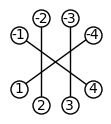

In [18]:
B4=SetPartitionsBk(4)
s=B4[3]
print s
partition_to_graph(s,4).show(figsize=1.7)

This element is actually in the Symmetric Group, $S_4$, and we can identify it with the permutation $(1~4)$. Let $n=2$, $k=4$. We should want that $e_1\otimes e_1 \otimes e_1 \otimes e_2$ is sent to $e_2\otimes e_1 \otimes e_1 \otimes e_1$ under this permutation. Surely enough, $\delta(d)_{1,1,1,2}^{i_{-1},i_{-2},i_{-3},i_{-4}}$ will be zero everywhere except for $(i_{-1},i_{-2},i_{-3},i_{-4})=(2,1,1,1)$. 

Brauer diagrams can be defined as the partitions of $P_k$ for which every set in the partition has cardinality 2.

Here's a really basic, but important element of $B_2(z):$

{{-2, -1}, {1, 2}}


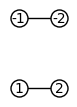

In [19]:
B2=SetPartitionsBk(2)
s=B2[2]
print s
partition_to_graph(s,2).show(figsize=1.7)

With $n=2$, this element will do the following to our simple basis tensors:

$$e_1\otimes e_1\mapsto e_1\otimes e_1+e_2\otimes e_2$$

$$e_2\otimes e_1\mapsto 0$$

$$e_1\otimes e_2\mapsto 0$$

$$e_2\otimes e_2\mapsto e_1\otimes e_1+e_2\otimes e_2$$

As a matrix representation, this would look like:

$$\left(\begin{array}{rrrr}
1 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
1 & 0 & 0 & 1
\end{array}\right)$$

So how can we generalize this to the fullest extent for any $n$ and any $k$? We need to define a representation, $\psi:B_k(z)\rightarrow \text{End}(V)$. Just like last time, we will be using the set $\{0,...,n-1\}$ to index our basis vectors $e_i$ in order to create a convention on the $n$-ary expansion of the vector corresponding to $(i_1,...,i_k)$. What we will do differently is define our local function not on the Symmetric Group, but on the Set Partitions themselves. This serves as a basis, but we do not get a simple permutation as a group action on the list $(i_1,...,i_k)$ like we did with the basis set $S_k$. So, we need to get a little more creative. The upshot here is that we can adapt this setup for any general diagram algebra, and not just $B_k$.

One obstacle to overcome is defining the $\delta$ function. How do we tell that two vertices are connected in our graph? One thing we can do is find all of the connected components of the graph itself!

In [20]:
def connected_components(m):
    collection=[]
    for X in m:
        collection.append(X)

    subsetsofsizetwo=[]
    for X in collection:
        for Y in Set(X).subsets(2):
            subsetsofsizetwo.append(Y)
    return subsetsofsizetwo

Let's see if this works!

{{-4, -3, -2, -1, 1, 2, 3}, {4}}


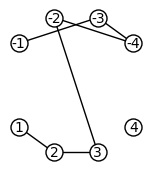

[{1, 2}, {1, 3}, {1, -1}, {1, -4}, {1, -3}, {1, -2}, {2, 3}, {2, -1}, {2, -4}, {2, -3}, {2, -2}, {3, -1}, {3, -4}, {3, -3}, {3, -2}, {-4, -1}, {-3, -1}, {-2, -1}, {-4, -3}, {-4, -2}, {-3, -2}]


In [21]:
P4=SetPartitionsPk(4)
s=P4[1]
print s
partition_to_graph(s,4).show(figsize=2.7)

print connected_components(s)

Knowing what two vertices are connected in our graph should make defining $\delta$ a breeze.

In [23]:
def delta(m,k,pos_index=[],neg_index=[]):
    """
    returns 0 or 1
    pos/neg_index are lists of size k with entries {0,...,n-1}
    """
    #first we check the for the negation of {r,s}-->i_r=i_s
    del_dict={}
    for i in range(1,k+1):
        del_dict[i]=pos_index[i-1]
    for i in range(-k,0):
        del_dict[i]=neg_index[-i-1]
    ConnectedComp=connected_components(m)
    for x in ConnectedComp:
        if del_dict[x[0]] != del_dict[x[1]]:
            return 0
    #since the negation is false, we must have that delta is 1
    return 1

Let's look at $\delta_{1,1,1,2}^{1,1,1,1}((1~4))$ and $\delta_{1,1,1,2}^{2,1,1,1}((1~4))$:

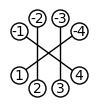

In [24]:
B4=SetPartitionsBk(4)
s=B4[3]
partition_to_graph(s,4).show(figsize=1.7)

In [25]:
print "delta(s,k,[1,1,1,2],[1,1,1,1]) is: "
print delta(s,4,[1,1,1,2],[1,1,1,1])
print "delta(s,k,[1,1,1,2],[2,1,1,1]) is: "
print delta(s,4,[1,1,1,2],[2,1,1,1])

delta(s,k,[1,1,1,2],[1,1,1,1]) is: 
0
delta(s,k,[1,1,1,2],[2,1,1,1]) is: 
1


Now, let's define $\psi$ on the basis elements of $P_k$:

In [26]:
def psi_local(m,n,k):
    # function takes m in Partition{-k,...,k} and returns
    # an n^k matrix as its action on our basis
    z=zero_matrix(n^k)
    for j in range(0,n^k): #columns
        l=NN(j).digits(n) #list of base n digits
        l.reverse() #read right to left in expansion
        s=[0] #digits returns the minimal list of non-zero elements in the expansion, so we need to make it uniform
        while len((n^k-1).digits(n))-len(l) !=0:
            l=s+l
        for i in range(0,n^k): #rows
            h=NN(i).digits(n)
            h.reverse()
            while len((n^k-1).digits(n))-len(h) !=0:
                h=s+h
            z[i,j]=delta(m,k,l,h)
    return z

This next chunk of code will let us know if everything is running smoothly:

{{-2, 1}, {-1, 2}} is identified with the permutation (1 2).
It can be visualized as: 


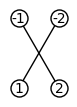

Then rho((1 2))=psi((1 2)):
[1 0 0 0]
[0 0 1 0]
[0 1 0 0]
[0 0 0 1]
Just to be sure, when n=2,k=3:
{{-3, 3}, {-2, 1}, {-1, 2}} goes to (1 2)
It can be visualized as: 


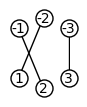

And it's representation is: 
[1 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0]
[0 0 0 0 0 1 0 0]
[0 0 1 0 0 0 0 0]
[0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 1]

Now for some random old diagram: 
{{-3, -2, 3}, {-1, 1, 2}}
It can be visualized as: 


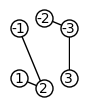

And it's representation is: 
[1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1]


In [27]:
n=2
k=2
Sk=SetPartitionsSk(k)
transposition=Sk[1]
print str(transposition)+" is identified with the permutation (1 2)."
print "It can be visualized as: "
partition_to_graph(transposition,k).show(figsize=1.7)
print "Then rho((1 2))=psi((1 2)):"
print psi_local(transposition,n,k)
print "Just to be sure, when n=2,k=3:"
k=3
Sk=SetPartitionsSk(k)
transposition=Sk[2]
print str(transposition)+" goes to (1 2)"
print "It can be visualized as: "
partition_to_graph(transposition,k).show(figsize=1.7)
print "And it's representation is: "
print psi_local(transposition,n,k)
print ""
print "Now for some random old diagram: "
Sk=SetPartitionsPk(k)
s=Sk[21]
print s
print "It can be visualized as: "
partition_to_graph(s,k).show(figsize=1.7)
print "And it's representation is: "
print psi_local(s,n,k)

More exotic examples!

{{-3, -2, -1, 1}, {2, 3}} from A_k has diagram: 


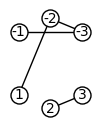

and it's representation is: 
[1 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 1]

{{-3, 1}, {-2, 2}, {-1, 3}} from B_k has diagram: 


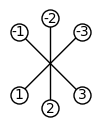

and it's representation is: 
[1 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0]
[0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 1 0]
[0 1 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0]
[0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 1]

{{-3, -2, -1, 1, 2}, {3}} from P_k has diagram: 


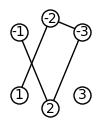

and it's representation is: 
[1 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 1]



In [28]:
n=2;k=3
Ak=SetPartitionsAk(k)
Bk=SetPartitionsBk(k)
Pk=SetPartitionsPk(k)
a=Ak[3]
b=Bk[0]
p=Pk[1]

print str(a) + " from A_k has diagram: "
partition_to_graph(a,k).show(figsize=2.0)
print "and it's representation is: "
print psi_local(a,n,k)
print ""

print str(b) + " from B_k has diagram: "
partition_to_graph(b,k).show(figsize=2.0)
print "and it's representation is: "
print psi_local(b,n,k)
print ""


print str(p) + " from P_k has diagram: "
partition_to_graph(p,k).show(figsize=2.0)
print "and it's representation is: "
print psi_local(p,n,k)
print ""


Now, we go on to define $\psi$ on an arbitrary element of the Brauer algebra.

In [29]:
def vectorize_element_Bk(s,lst):
    vec=zero_vector(QQbar,len(lst))
    for i in range(0,len(lst)):
        vec[i]=s.coefficient(lst[i])
    return vec

In [30]:
def psi_Bk(v,n,k):
    lst=da.BrauerDiagrams(k).list() #basis
    vec=vectorize_element_Bk(v,lst) #coefficient vector
    mat=zero_matrix(QQbar,n^k)
    for i in range(0,len(lst)):
        if vec[i]!=0:
            mat+=vec[i]*psi_local(lst[i],n,k)
    return mat

Let's see what it gets us for a Jucys Murphy element of the algebra!

In [31]:
k=3
n=2
Bk_alg=BrauerAlgebra(k,n,QQbar)
v=Bk_alg.jucys_murphy(3)
print "The element is: "
print v
print "It's action on V is: "
print psi_Bk(v,n,k)

The element is: 
-B{{-3, -2}, {-1, 1}, {2, 3}} - B{{-3, -1}, {-2, 2}, {1, 3}} + B{{-3, 1}, {-2, 2}, {-1, 3}} + B{{-3, 2}, {-2, 3}, {-1, 1}} + 1/2*B{{-3, 3}, {-2, 2}, {-1, 1}}
It's action on V is: 
[1/2   0   0  -1   0  -1   0   0]
[  0 1/2   1   0   1   0   0   0]
[  0   1 1/2   0   0   0   0  -1]
[ -1   0   0 1/2   0   0   1   0]
[  0   1   0   0 1/2   0   0  -1]
[ -1   0   0   0   0 1/2   1   0]
[  0   0   0   1   0   1 1/2   0]
[  0   0  -1   0  -1   0   0 1/2]


The Jucys-Murphy elements give us a means to calculate the idempotents of a multiplicity-free family of unital algebras. Therefore, knowing the Jucys-Murphy elements and the combinatorics behind the Induction and Restriction operations on the family gives us a recursive formula for the idempotents of the irreducible representations of $B_k(z)$. Our methods closely follow those of Doty, Lauve, and Seelinger https://arxiv.org/pdf/1606.08900.pdf, and we refer their paper to the reader to review before proceeding further.

Let $\lambda$ be in the indexing set for the irreps of $B_k(z)$, $Tab(k)$. Let $\mu$ be in the indexing set for the irreps of $B_{k-1}(z)$, $Tab(k-1)$. The Jucys-Murphy sequence $(J_0,J_1,...,J_k)$ can be seen as elements in $B_k(z)$ by inclusion. 

If $T=(\lambda_0,...,\lambda_k=\lambda)$ corresponds to the Gelfand-Tsetlin basis element $v_T$, and $S=(\mu_0,...,\mu_k)$ corresponds to $v_S$, we define:

$$c_T(k)=\begin{cases}j-i & \text{if } \lambda_k \text{ has one more box than than } \lambda_{k-1}\\
(1-z)+i-j & \text{if } \lambda_k \text{ has one less box than than } \lambda_{k-1}\\
\end{cases}$$

The Gelfand-Tsetlin basis for $B_k(z)^\lambda$ is the set $\{v_T~:~T\in Tab(k)\}$. For $T=(\lambda_0,...,\lambda_k)$, the truncation is the element $\bar{T}=(\lambda_0,...,\lambda_{k-1})\in Tab(k-1)$. We define the interpolating polynomial as: 

$$P_T(x)=\prod_{S\in Tab(k)\\~~~S\neq T\\~~~\bar{S}=\bar{T}}\frac{x-c_S(k)}{c_T(k)-c_S(k)}$$

We usually use the notation $P_{\mu}^{\lambda}$ to denote that this function really only depends on the $\mu$'s for which $\mu=\lambda_{n-1}$ (we say then that $\mu\vdash \lambda$). Finally, we obtain a recursive formula for the idempotent of $\lambda$ as:

$$e_\lambda=\sum_{~~\mu\\\mu\vdash\lambda}P_\mu^\lambda(J_k)e_\mu$$

In general, the sum $z_k=J_1+...+J_k$ is in the center of $B_k(z)$ and it acts diagonally on $B_k(z)^\lambda$. The $T$ content of $J_k$ is the $\mathbb{C}$ vector $(c_T(1),...,c_T(k))$, where $J_m\cdot v_T=c_T(m)v_T$. This can be shown pretty straightforwardly, since $J_m=z_m-z_{m-1}$ and $v_{T}=v_{\bar{T}}$. Therefore, for $\mu$ with $\mu=\lambda_{k-1}$, $z_{k}\cdot v_T=a_\lambda v_T$ and $z_{k-1}\cdot v_T=a_\mu v_T$ and it follow that $c_T(k)=a_\lambda-a_\mu$.

In order to make this work, we need a Jucys-Murphy sequence that agrees with the $T$ content. We will follow the cue of Stephen Doty, Aaron Lauve, AND George H. Seelinger (https://arxiv.org/pdf/1606.08900.pdf) and define our sequence as follows:

$$J_k=\sum_{i=1}^{k-1}[(i~k)-\overline{(i~k)} ]$$

with $J_1=0$, $(i~k)=\{\{1,-1\},...,\{i,-k\},\{i+1,-(i+1)\},...,\{k,-i\} \}$, the standard transposition, and $\overline{(i~k)}=\{\{1,-1\},...,\{i,k\},\{-i,-k\},\{i+1,-(i+1)\},...,\{k-1,-(k-1)\} \}$, the cap-cup.

For example:

{{-4, 4}, {-3, -1}, {-2, 2}, {1, 3}}
The element (1 3) in B_4(z) is: 
{{-4, 4}, {-3, 1}, {-2, 2}, {-1, 3}}


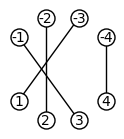

The cap-cup version of (1 3) is:
{{-4, 4}, {-3, -1}, {-2, 2}, {1, 3}}


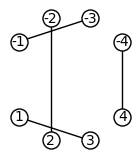

In [32]:
k=4
Sk=SetPartitionsBk(k)
s=Sk[45]
d=Sk[58]
print d
print "The element (1 3) in B_4(z) is: "
print s
partition_to_graph(s,k).show(figsize=2.2)
print "The cap-cup version of (1 3) is:"
print d
partition_to_graph(d,k).show(figsize=2.5)


Now let's work out a function that gives us the Jucys-Murphy elements we want. People have already implemented Jucys-Murphy elements for the Brauer algebra in SAGE, but they differ from the ones we want by $\frac{z-1}{2}$. 

In [33]:
def our_jucys_murphy(n,k,z,R=QQbar):
    Bk=BrauerAlgebra(k,z,R)
    assert(n<=k)
    s=Bk.jucys_murphy(n)
    z=s-((z-1)/2)
    return z

The business with the boxes lets us interpret $Tab(k)$ as a set of integer partitions, i.e. $[3,1,1]$ corresponds to:

In [34]:
p=Partition([3,1,1])
p.pp()

***
*
*


The pair $(i,j)$ is the (row,column) location of a box (in our case asterisk) in the partition. The content of a box is the value $j-i$. We can print the contents like this:

In [35]:
p=Partition([5,4,3,2,1])
p.pp()
p.contents_tableau().pp()

*****
****
***
**
*
  0  1  2  3  4
 -1  0  1  2
 -2 -1  0
 -3 -2
 -4


The contents of boxes added or removed becomes a vital part of how we understand the action of the Jucys-Murphy elements on the GT basis of our algebra. Let us first try and understand what the simple subalgebras of $B_k(z)$ look like. We assume that either $z>k$ when $z$ is an integer, or $z\in \mathbb{C}\backslash \mathbb{Z}$ so that $B_k(z)=B_k$ is semisimple.

It can be shown for example that the set of irreducible representations are indexed by the following partitions:

$$Irr(k)=\{\lambda~:~\lambda\vdash (k-2l),~~~~0\leq2l\leq k \} $$.

We understand $\lambda\vdash (k-2l)$ to mean that the partition sums up to $k-2l$, e.g. $[2]$ is in $Irr(4)$ because it sums up to $2=4-2$, but $[1,1,1]$ is not because its sum is $3\neq 4-2l$. Let's create a function that returns a list of such partitions:

In [36]:
def list_of_brauer_irreducibles(k):
    if k==0:
        return [Partition([])]
    lst=[]
    possible_sums=[]
    
    for w in range(0,k+1):
        if w%2==0: #even
            possible_sums.append(k-w)
    for x in possible_sums:
        for y in Partitions(x):
            lst=[y]+lst
    return lst

And to draw them out:

In [37]:
def partition_to_figure_list(p):
    lst=[]
    i=0
    for y in p:
        for z in range(0,y):
            lst+=[polygon2d([[z,i],[z+1,i],[z+1,i+1],[z,i+1]],edgecolor='black',fill=False)]
        i=i-1
    return lst

In [38]:
def plot_partition_figure_list(lst):
    plotlst=[]
    for x in lst:
        plotlst+=[plot(x)]
    show(sum(plotlst),axes=False,figsize=1.2)

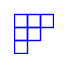

In [39]:
x=Partition([3,2,1])
plot_partition_figure_list(partition_to_figure_list(x))

Now all of the $k^{th}$ irreps can be viewed as:

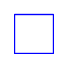

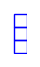

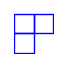

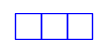

In [40]:
for x in list_of_brauer_irreducibles(3):
    plot_partition_figure_list(partition_to_figure_list(x))

The empty partition $[]$ will appear as a 0. One could use these objects as vertices, and program a Bratelli Diagram as a graph, which would help in understanding the GT basis for each irreducible representation. But for our purposes, we will focus namely on computing idempotents. We will view elements of the GT basis as $k+1$ vectors of partitions $T=(\lambda_0,...,\lambda_k)$. Let us begin by defining $c_T(k)$:

In [41]:
def T_content_at_k(T,k,z):
    M=Set(T[k].cells())
    N=Set(T[k-1].cells())
    if T[k].size()>T[k-1].size():
        O=M.difference(N)
        return ZZ(O[0][0])-ZZ(O[0][1])
    else:
        O=N.difference(M)
        return ZZ(O[0][1])-ZZ(O[0][0])+1-z

Let's look at both cases:

In [42]:
k=3
T={}
T[k]=Partition([3,2,1])
T[k-1]=Partition([3,2])
print T_content_at_k(T,k,0)

2


The content of the box missing! Now if instead we look at $T[k]=[3,2]$ and $T[k-1]=[3,2,1]$, $\lambda_k$ has one less box than $\lambda_{k-1}$, the box at $(i,j)=(2,0)$. Let $z=0$, then $c_T(k)=1-z+i-j=1-0+2-0=3$. Let's see if it worked.

In [43]:
T={}
T[k]=Partition([3,2])
T[k-1]=Partition([3,2,1])
print T_content_at_k(T,k,0)

-1


Now given a partition $\lambda_k$, how do we get the list of partitions $\mu$ such that $\mu$ can have a box added or removed to become $\lambda_k$? Well, we already know what partitions are available at the level $k-1$!

In [44]:
def permissible_paths_to_partition(P,k):
    assert(P in list_of_brauer_irreducibles(k))
    lst=[]
    box_num=len(P.cells())
    for x in list_of_brauer_irreducibles(k-1):
        if abs(len(x.cells())-box_num)==1:
            lst+=[x]
    new_lst=[]
    for x in lst:
        if box_num-len(x.cells())==1:
            for y in P.cells():
                if y in x.addable_cells():
                    if x.add_cell(y[0])==P:
                        new_lst+=[x]
        elif box_num-len(x.cells())==-1:
            for y in x.cells():
                if y in x.removable_cells():
                    if x.remove_cell(y[0])==P:
                        new_lst+=[x]
    return new_lst

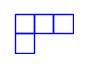

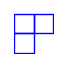

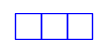

In [45]:
d=Partition([3,1])
plot_partition_figure_list(partition_to_figure_list(d))
for x in permissible_paths_to_partition(d,4):
    plot_partition_figure_list(partition_to_figure_list(x))

In order to get a list for the GT basis, we need to recursively find all possible paths. We employ the use of a global list variable,GT_basis, to keep track of the paths, and a recursive Depth-First Search algorithm to do so. We pass a list and an integer every time in order to add this new partition to the list.

It is important to always initialize GT_basis with GT_basis=[] before running this function. Otherwise, it will just keep adding paths.

In [46]:
def GelfandTsetlinBasis(P,k,GT_basis,path=[]):
    path+=[P]
    if k==0:
        GT_basis.append(list(path)) 
        #python passes a list by reference,
        #so we use list() to create a new one
    branches=permissible_paths_to_partition(P,k)
    for x in branches:
        GelfandTsetlinBasis(x,k-1,GT_basis,path)
    path.pop(len(path)-1)

Just in case any duplicates arise, let's define a function to take care of that! And let's look at an example.

In [47]:
def list_of_tableaus_to_partition(P,k):
    GT_list=[]
    GelfandTsetlinBasis(P,k,GT_list,[])
    GT_basis=[]
    for x in GT_list:
        x.reverse() # read paths to start at level k=0
    for x in GT_list: # gets rid of duplicates
        if x not in GT_basis:
            GT_basis.append(x)
    return GT_basis
    

As an example:

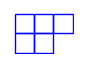

[[[], [1], [1, 1], [2, 1], [2, 2], [3, 2]],
 [[], [1], [2], [2, 1], [2, 2], [3, 2]],
 [[], [1], [1, 1], [2, 1], [3, 1], [3, 2]],
 [[], [1], [2], [2, 1], [3, 1], [3, 2]],
 [[], [1], [2], [3], [3, 1], [3, 2]]]

In [48]:
d=Partition([3,2])
plot_partition_figure_list(partition_to_figure_list(d))
list_of_tableaus_to_partition(d,5)

Let $T$ be a tableau of $k+1$ partitions, and $T_i$ correspond to its truncation taken $k-i$ times. This way $T_k=T$, and $T_0=(\lambda_0)$. We use $T[k]$ to denote the partition entry of the tableau at the k^{th} level. Then the idempotent of the Gelfand-Tsetlin vector $v_T$ in the algebra corresponding to the partition $T[k]$ is given as:

$$e_T=\prod_{i=1}^k P_{T_i}(J_{i})$$,

where $J_i$ is the $i^{th}$ Jucys-Murphy element. The idempotent then corresponding to the partition $T[k]$ is given as:

$$e_{T[k]}=\sum_{T\in Tab(k)}e_T$$

Let's try and program a way to truncate tableaus:

In [49]:
def truncate_tableau(T,k,i):
    #take a tableau at the k^{th} level and truncate it k-i times
    S=[]
    S=list(T)
    if i == k:
        return S
    for p in range(0,k-i):
        S.pop()
    return S

Now to define the interpolating polynomial given a tableau T with k+1 entries:

In [50]:
def interpolating_polynomial(x,T,k,z):
    assert(T[k] in list_of_brauer_irreducibles(k))
    Bk_alg=BrauerAlgebra(k,z,QQbar)
    iden=Bk_alg.one()
    val=iden
    if k==0:
        return val
    lst=[]
    brauer_irred_lst=list_of_brauer_irreducibles(k)
    for t in brauer_irred_lst:
        tmp_lst=list_of_tableaus_to_partition(t,k)
        for y in tmp_lst:
            lst.append(y)
    lst.remove(T)
    truncatedT=truncate_tableau(T,k,k-1)
    new_lst=[]
    for S in lst:
        truncatedS=truncate_tableau(S,k,k-1)
        if truncatedS==truncatedT and T!=S:
            new_lst.append(S)
    if len(new_lst)==0:
        return iden
    c_T=T_content_at_k(T,k,z)
    for S in new_lst:
        c_S=T_content_at_k(S,k,z)
        new_val=(x-c_S*iden)*((1/(c_T-c_S))*iden)
        val=val*new_val
    return val

In [51]:
k=4
z=10
Bk_alg=BrauerAlgebra(k,z,QQbar)
elem=Bk_alg.jucys_murphy(3)
iden=Bk_alg.one()
print "The element we want to pass through P_T:"
print elem
lst=list_of_tableaus_to_partition(Partition([2,2]),4)
print "The T we are going to use to do it:"
vec=lst[0]
print vec
print "The final result:"
print interpolating_polynomial(elem,vec,k,z)
print "In vector form:"
print vectorize_element_Bk(interpolating_polynomial(elem,vec,k,z),SetPartitionsBk(k).list())

The element we want to pass through P_T:
-B{{-4, 4}, {-3, -2}, {-1, 1}, {2, 3}} - B{{-4, 4}, {-3, -1}, {-2, 2}, {1, 3}} + B{{-4, 4}, {-3, 1}, {-2, 2}, {-1, 3}} + B{{-4, 4}, {-3, 2}, {-2, 3}, {-1, 1}} + 9/2*B{{-4, 4}, {-3, 3}, {-2, 2}, {-1, 1}}
The T we are going to use to do it:
[[], [1], [1, 1], [2, 1], [2, 2]]
The final result:
139/80*B{{-4, 4}, {-3, -2}, {-1, 1}, {2, 3}} - 11/128*B{{-4, 4}, {-3, -2}, {-1, 2}, {1, 3}} + 419/640*B{{-4, 4}, {-3, -2}, {-1, 3}, {1, 2}} - 11/128*B{{-4, 4}, {-3, -1}, {-2, 1}, {2, 3}} + 139/80*B{{-4, 4}, {-3, -1}, {-2, 2}, {1, 3}} + 419/640*B{{-4, 4}, {-3, -1}, {-2, 3}, {1, 2}} + 419/640*B{{-4, 4}, {-3, 1}, {-2, -1}, {2, 3}} - 1089/160*B{{-4, 4}, {-3, 1}, {-2, 2}, {-1, 3}} - 891/640*B{{-4, 4}, {-3, 1}, {-2, 3}, {-1, 2}} + 419/640*B{{-4, 4}, {-3, 2}, {-2, -1}, {1, 3}} - 891/640*B{{-4, 4}, {-3, 2}, {-2, 1}, {-1, 3}} - 1089/160*B{{-4, 4}, {-3, 2}, {-2, 3}, {-1, 1}} + 27/160*B{{-4, 4}, {-3, 3}, {-2, -1}, {1, 2}} - 9/40*B{{-4, 4}, {-3, 3}, {-2, 1}, {-1, 2}} - 61

Before we can begin multiplying elements in $B_{k-i}$ with those in $B_k$, we need to find a way to inject one into another. Otherwise, we will turn up an error. The injection is pretty simple. If $v$ is in $B_{k-i}$, then every diagram of $v$ is passed into a diagram of rank $k$ by adding the pairs $\{(k-i+1),-(k-i+1)\},...,\{k,-k\}$.

In [52]:
def inject_kminusi_into_k_local(d,k,i):
    lst=[]
    for x in d:
        lst+=[x]
    Bk=da.BrauerDiagrams(k)
    for x in range(k-i+1,k+1):
        lst+=[(-x,x)]
    return Bk(Set(lst))

Now we define it for arbitrary algebra elements:

In [53]:
def inject_kminusi_into_k(v,k,i,z):
    Bk_alg=BrauerAlgebra(k,z,QQbar)
    val=Bk_alg.zero()
    kminusibasis=da.BrauerDiagrams(k-i).list()
    kminusivec=vectorize_element_Bk(v,kminusibasis)
    for y in range(0,len(kminusibasis)):
        if kminusivec[y]!=0:
            val+=kminusivec[y]*Bk_alg(inject_kminusi_into_k_local(kminusibasis[y],k,i))
    return val

And test to see if it works:

In [54]:
k=4
i=2
z=5
Bk_alg=BrauerAlgebra(k,z)
Bkminusi_alg=BrauerAlgebra(k-i,z)
elem=Bkminusi_alg.jucys_murphy(2)
print elem
kminusibasis=da.BrauerDiagrams(k-i).list()
Bk=da.BrauerDiagrams(k)
inject_kminusi_into_k(elem,k,i,z)

-B{{-2, -1}, {1, 2}} + B{{-2, 1}, {-1, 2}} + 2*B{{-2, 2}, {-1, 1}}


-B{{-4, 4}, {-3, 3}, {-2, -1}, {1, 2}} + B{{-4, 4}, {-3, 3}, {-2, 1}, {-1, 2}} + 2*B{{-4, 4}, {-3, 3}, {-2, 2}, {-1, 1}}

The idempotent of a tableau can be acquired as:

$$e_T=\prod_{i=1}^{k}P_{T[i]}(J_i)$$

In [55]:
def idempotent_of_tableau_at_k(T,k,z):
    Bk_alg=BrauerAlgebra(k,z,QQbar)
    J={}
    prod=Bk_alg.one()
    if k==0:
        return prod
    for y in range(1,k+1):
        J[y]=our_jucys_murphy(y,y,z)
    F=[]
    F=list(T)
    for j in range(0,k):
        val=interpolating_polynomial(J[k-j],F,k-j,z)
        F=truncate_tableau(F,k,k-1)
        new_val=inject_kminusi_into_k(val,k,j,z)
        prod=new_val*prod
    return prod
        

The idempotent of a partition $T[k]$ is then the sum:

$$e_{T[k]}=\sum_{~~~S\in \text{Irr}(k)\\ ~~~S[k]=T[k] }e_S$$

In [56]:
def idempotent_of_partition_at_k(P,k,z):
    Bk_alg=BrauerAlgebra(k,z,QQbar)
    val_sum=Bk_alg.zero()
    basis=da.BrauerDiagrams(k)
    if k==0:
        return Bk_alg.one()
    lst=list_of_tableaus_to_partition(P,k)
    for x in lst:
        idempotent_of_x=idempotent_of_tableau_at_k(x,k,z)
        val_sum+=idempotent_of_x
    return val_sum

Lastly, we check if these are indeed the primitive, central, mutually orthogonal idempotents we seek!
We must have that:

1. $e_Te_S=0$ for $T\neq S$
2. $e_T^2=e_T$ for all $T$
3. $\sum e_T=1$

This chunk of code will test for all of that:

Testing the partition:


0

Is e_T^2=e_T?
Yes!
Is it mutually orthogonal with the rest?
Yes!
Testing the partition:


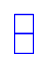

Is e_T^2=e_T?
Yes!
Is it mutually orthogonal with the rest?
Yes!
Testing the partition:


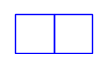

Is e_T^2=e_T?
Yes!
Is it mutually orthogonal with the rest?
Yes!
Testing the partition:


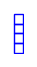

Is e_T^2=e_T?
Yes!
Is it mutually orthogonal with the rest?
Yes!
Testing the partition:


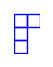

Is e_T^2=e_T?
Yes!
Is it mutually orthogonal with the rest?
Yes!
Testing the partition:


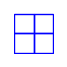

Is e_T^2=e_T?
Yes!
Is it mutually orthogonal with the rest?
Yes!
Testing the partition:


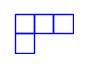

Is e_T^2=e_T?
Yes!
Is it mutually orthogonal with the rest?
Yes!
Testing the partition:


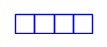

Is e_T^2=e_T?
Yes!
Is it mutually orthogonal with the rest?
Yes!
The sum of all these idempotents are:
B{{-4, 4}, {-3, 3}, {-2, 2}, {-1, 1}}


In [57]:
k=4
z=5
Bk_alg=BrauerAlgebra(k,z,QQbar)
lst=list_of_brauer_irreducibles(k)
basis=da.BrauerDiagrams(k)
the_sum=Bk_alg.zero()
for p in lst:
    x=idempotent_of_partition_at_k(p,k,z)
    the_sum+=x
    print "Testing the partition:"
    plot_partition_figure_list(partition_to_figure_list(p))
    print "Is e_T^2=e_T?"
    if x^2==x:
        print "Yes!"
    else:
        print "No!"
    print "Is it mutually orthogonal with the rest?"
    flag=True
    for q in lst:
        if q!=p:
            y=idempotent_of_partition_at_k(q,k,z)
            if x*y!=0:
                flag=False
    if flag:
        print "Yes!"
    else:
        print "No!"
print "The sum of all these idempotents are:"
print the_sum
    

And now we can figure out what representations of these idempotents project onto isotypic components corresponding to these partitions, deduce from the ranks of these matrices and the dimensions of the irreducible submodules of $B_k(z)$ exactly how our spaces decompose. The size of the Gelfand-Tsetlin basis will tell us exactly what this dimesnion is.

It is important to note that $B_k(z)$ is semisimple for positive integers $n$ only when $n\geq k$. We could potentially run into division by zero errors from the interpolating polynomial functions. Let's try an example.

Testing the partition:


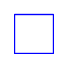

The dimension of this submodule is: 
3
The rank of the representation of the corresponding idempotent is: 
9
Therefore, the irreducible representation of this element decomposes into :
3 copies of the submodule
Testing the partition:


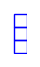

The dimension of this submodule is: 
1
The rank of the representation of the corresponding idempotent is: 
7
Therefore, the irreducible representation of this element decomposes into :
7 copies of the submodule
Testing the partition:


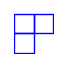

The dimension of this submodule is: 
2
The rank of the representation of the corresponding idempotent is: 
10
Therefore, the irreducible representation of this element decomposes into :
5 copies of the submodule
Testing the partition:


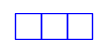

The dimension of this submodule is: 
1
The rank of the representation of the corresponding idempotent is: 
1
Therefore, the irreducible representation of this element decomposes into :
1 copies of the submodule
Do the representations sum up to the identity?
Yes!


In [58]:
k=3
n=3
Bk_alg=BrauerAlgebra(k,n,QQbar)
lst=list_of_brauer_irreducibles(k)
mat_sum=zero_matrix(n^k)
for p in lst:
    x=idempotent_of_partition_at_k(p,k,n)
    print "Testing the partition:"
    plot_partition_figure_list(partition_to_figure_list(p))
    print "The dimension of this submodule is: "
    l=len(list_of_tableaus_to_partition(p,k))
    print l
    mat_x=psi_Bk(x,n,k)
    print "The rank of the representation of the corresponding idempotent is: "
    r=mat_x.rank()
    print r
    print "Therefore, the irreducible representation of this element decomposes into :"
    print str((r/l))+" copies of the submodule"
    mat_sum+=mat_x
print "Do the representations sum up to the identity?" 
if mat_sum.is_one():
    print "Yes!"
else:
    print "No!"

Now, to see what some of these matrix representations of idempotents in $\text{End}(V)$ look like, let's try some smaller values for k:

Testing the partition:


0

The dimension of this submodule is: 
1
[1/5   0   0   0 1/5   0   0   0 1/5]
[  0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0]
[1/5   0   0   0 1/5   0   0   0 1/5]
[  0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0]
[1/5   0   0   0 1/5   0   0   0 1/5]
The rank of the representation of the corresponding idempotent is: 
1
Therefore, the irreducible representation of this element decomposes into :
1 copies of the submodule
Testing the partition:


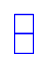

The dimension of this submodule is: 
1
[ 4/5    0    0    0 -1/5    0    0    0 -1/5]
[   0  1/2    0  1/2    0    0    0    0    0]
[   0    0  1/2    0    0    0  1/2    0    0]
[   0  1/2    0  1/2    0    0    0    0    0]
[-1/5    0    0    0  4/5    0    0    0 -1/5]
[   0    0    0    0    0  1/2    0  1/2    0]
[   0    0  1/2    0    0    0  1/2    0    0]
[   0    0    0    0    0  1/2    0  1/2    0]
[-1/5    0    0    0 -1/5    0    0    0  4/5]
The rank of the representation of the corresponding idempotent is: 
6
Therefore, the irreducible representation of this element decomposes into :
6 copies of the submodule
Testing the partition:


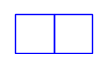

The dimension of this submodule is: 
1
[   0    0    0    0    0    0    0    0    0]
[   0  1/2    0 -1/2    0    0    0    0    0]
[   0    0  1/2    0    0    0 -1/2    0    0]
[   0 -1/2    0  1/2    0    0    0    0    0]
[   0    0    0    0    0    0    0    0    0]
[   0    0    0    0    0  1/2    0 -1/2    0]
[   0    0 -1/2    0    0    0  1/2    0    0]
[   0    0    0    0    0 -1/2    0  1/2    0]
[   0    0    0    0    0    0    0    0    0]
The rank of the representation of the corresponding idempotent is: 
3
Therefore, the irreducible representation of this element decomposes into :
3 copies of the submodule
Do the representations sum up to the identity?
Yes!
[1 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0]
[0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0 1]


In [59]:
k=2
n=3
Bk_alg=BrauerAlgebra(k,n,QQbar)
lst=list_of_brauer_irreducibles(k)
mat_sum=zero_matrix(QQbar,n^k)
for p in lst:
    x=idempotent_of_partition_at_k(p,k,z)
    print "Testing the partition:"
    plot_partition_figure_list(partition_to_figure_list(p))
    print "The dimension of this submodule is: "
    l=len(list_of_tableaus_to_partition(p,k))
    print l
    mat_x=psi_Bk(x,n,k)
    print mat_x
    print "The rank of the representation of the corresponding idempotent is: "
    r=mat_x.rank()
    print r
    print "Therefore, the irreducible representation of this element decomposes into :"
    print str((r/l))+" copies of the submodule"
    mat_sum+=mat_x
print "Do the representations sum up to the identity?" 
if mat_sum.is_one():
    print "Yes!"
else:
    print "No!"
print mat_sum